<a href="https://colab.research.google.com/github/KondamPravalikaReddy/AirAware-Smart-Air-Quality-Prediction/blob/main/Seaborn_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload kaggle.json (from your Kaggle account → API → Create New Token)
from google.colab import files
files.upload()   # Upload kaggle.json here

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"pravalikareddi","key":"cc23ca85e0877e600aaa326978d10bad"}'}

In [ ]:
# Move kaggle.json to correct path
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Dataset
!kaggle datasets download -d taweilo/taiwan-air-quality-data-20162024 -p ./ --unzip

#  Load Dataset
import pandas as pd
df = pd.read_csv("air_quality.csv", low_memory=False) # file name after unzip
print("Original Data:\n")
print(df.head())

Dataset URL: https://www.kaggle.com/datasets/taweilo/taiwan-air-quality-data-20162024
License(s): CC0-1.0
 77% 133M/172M [00:00<00:00, 1.39GB/s]
100% 172M/172M [00:00<00:00, 1.07GB/s]
Original Data:

               date   sitename          county   aqi pollutant    status  so2  \
0  2024-08-31 23:00      Hukou  Hsinchu County  62.0     PM2.5  Moderate  0.9   
1  2024-08-31 23:00  Zhongming   Taichung City  50.0       NaN      Good  1.6   
2  2024-08-31 23:00    Zhudong  Hsinchu County  45.0       NaN      Good  0.4   
3  2024-08-31 23:00    Hsinchu    Hsinchu City  42.0       NaN      Good  0.8   
4  2024-08-31 23:00     Toufen   Miaoli County  50.0       NaN      Good  1.0   

     co    o3 o3_8hr  ... windspeed winddirec unit co_8hr pm2.5_avg pm10_avg  \
0  0.17  35.0   40.2  ...       2.3       225  NaN    0.2      20.1     26.0   
1  0.32  27.9   35.1  ...       1.1       184  NaN    0.2      15.3     23.0   
2  0.17  25.1   40.6  ...       0.4       210  NaN    0.2      13.8     2

In [ ]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.layouts import gridplot

# Display plots inline
output_notebook()

# Load dataset
df = pd.read_csv("air_quality.csv", low_memory=False)

# Basic cleaning
df = df.rename(columns={'date': 'Date'})
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

# Convert pollutant columns to numeric, coercing errors
pollutant_cols = ['pm2.5', 'pm10', 'o3', 'co', 'no2', 'so2', 'no', 'nox']
for col in pollutant_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=['pm2.5', 'pm10', 'o3', 'co', 'no2'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# If there's a city or station column
if 'sitename' in df.columns:
    city_col = 'sitename'
elif 'Station' in df.columns:
    city_col = 'Station'
else:
    city_col = None

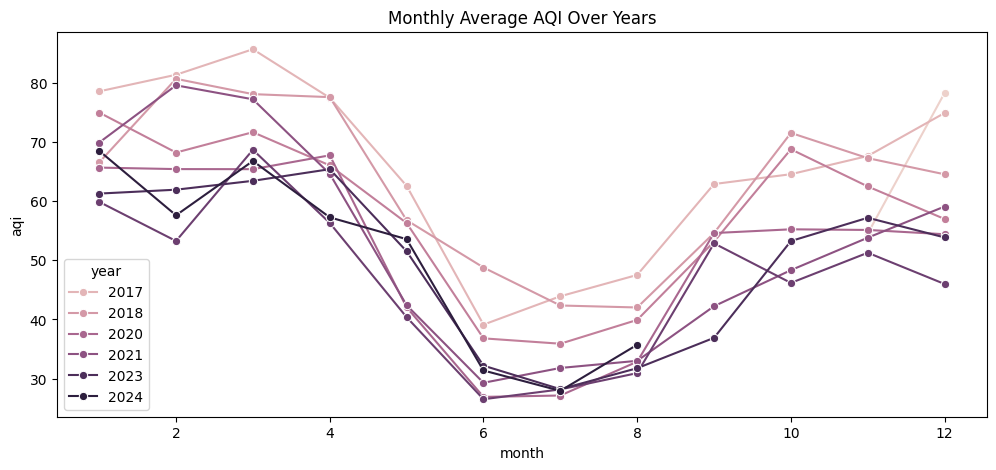

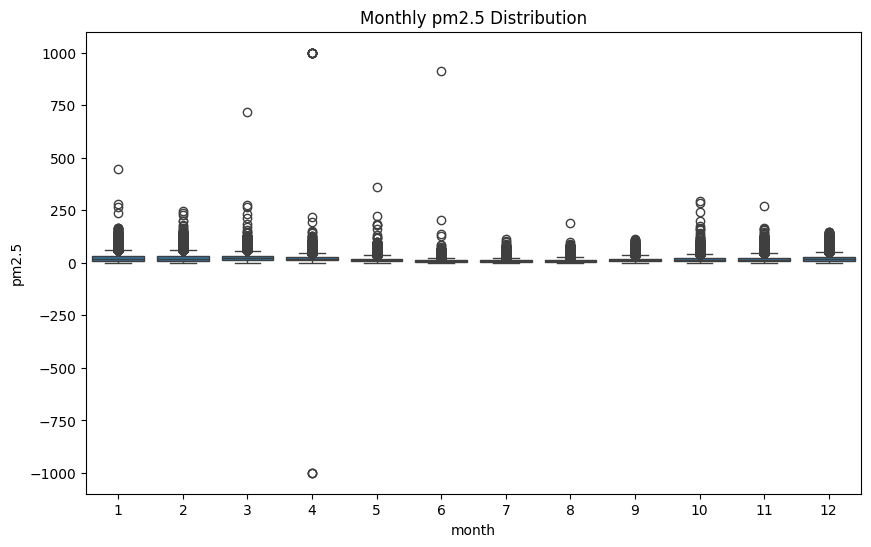

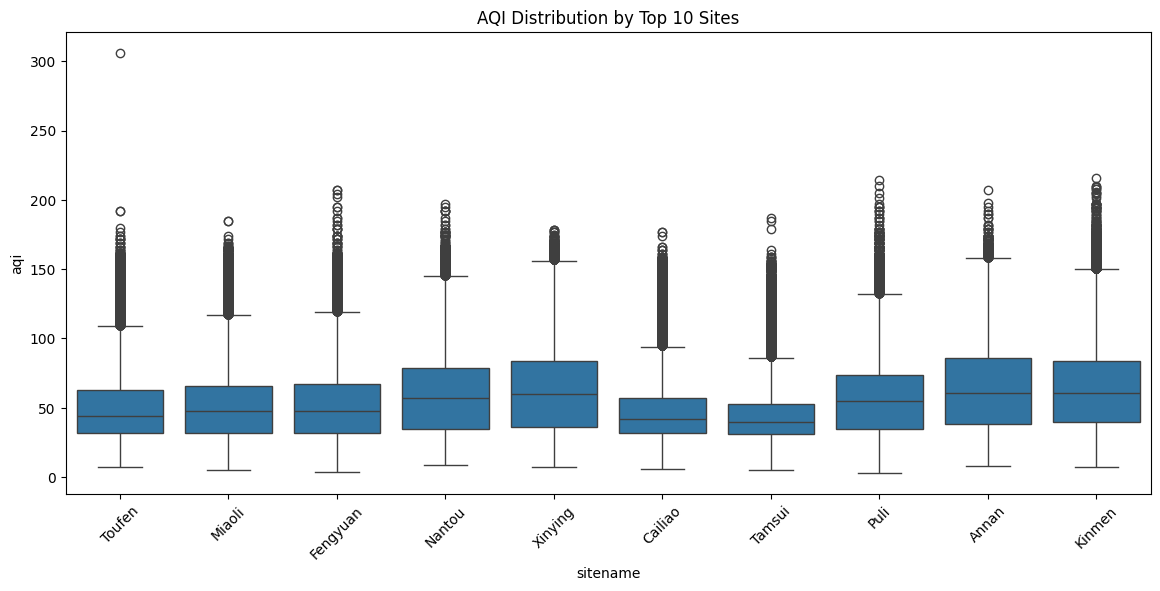

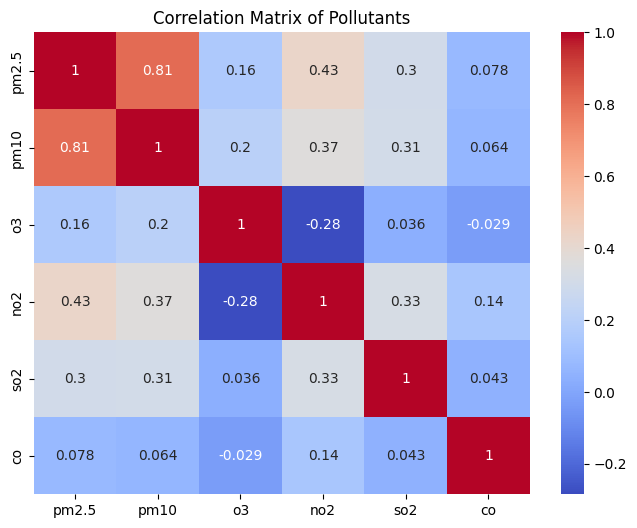

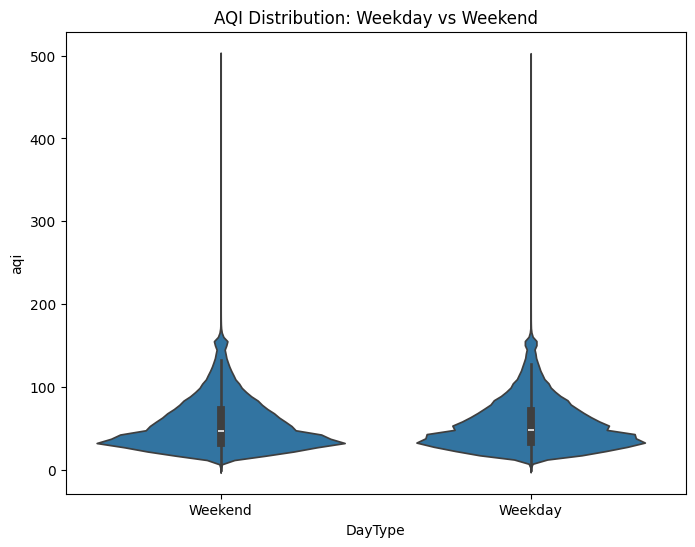

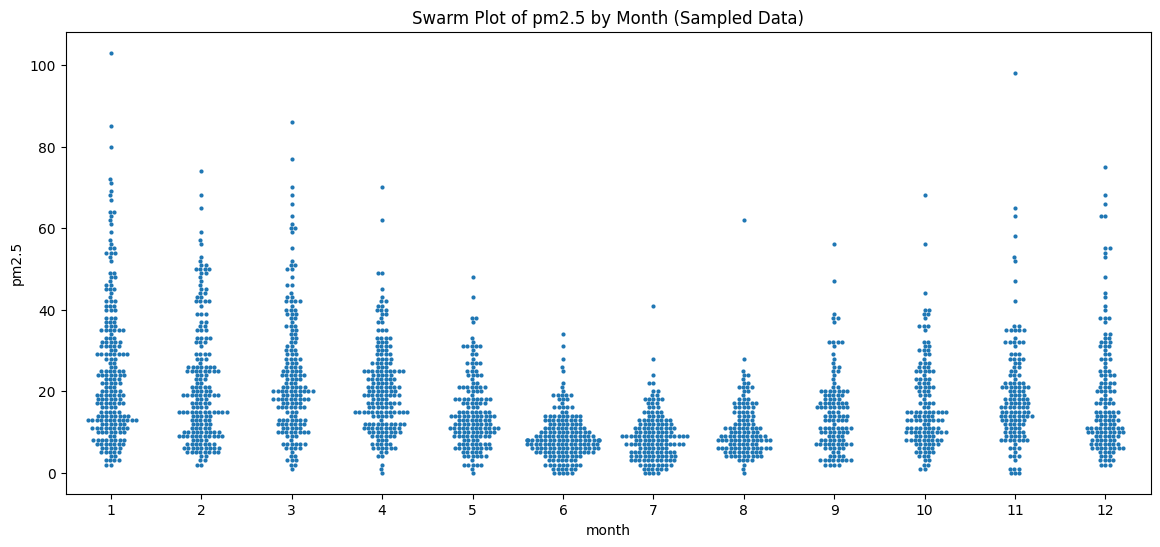

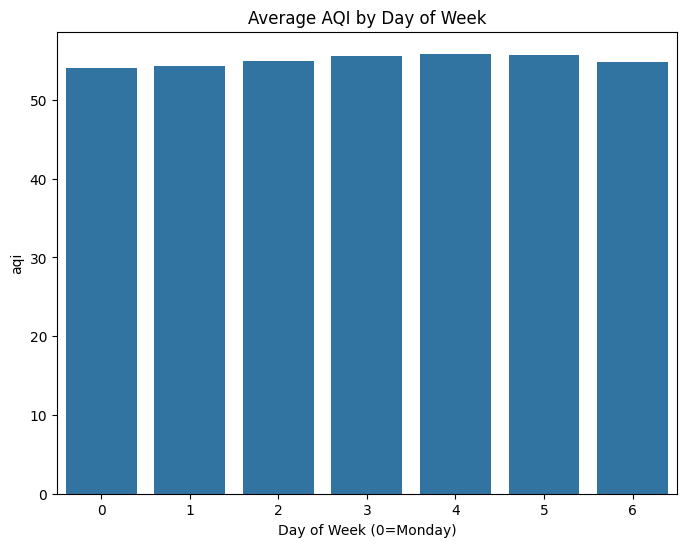

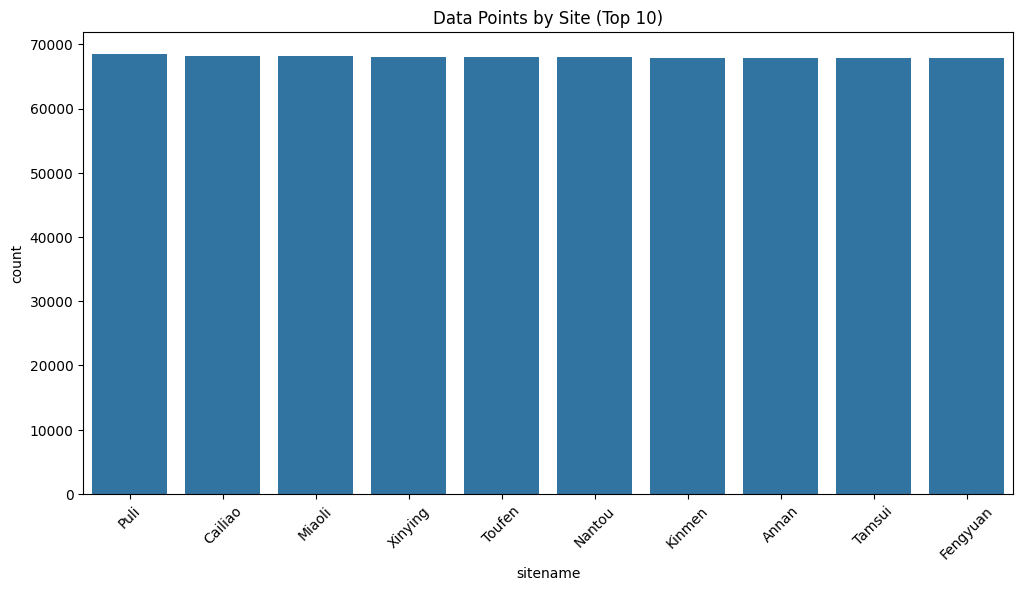

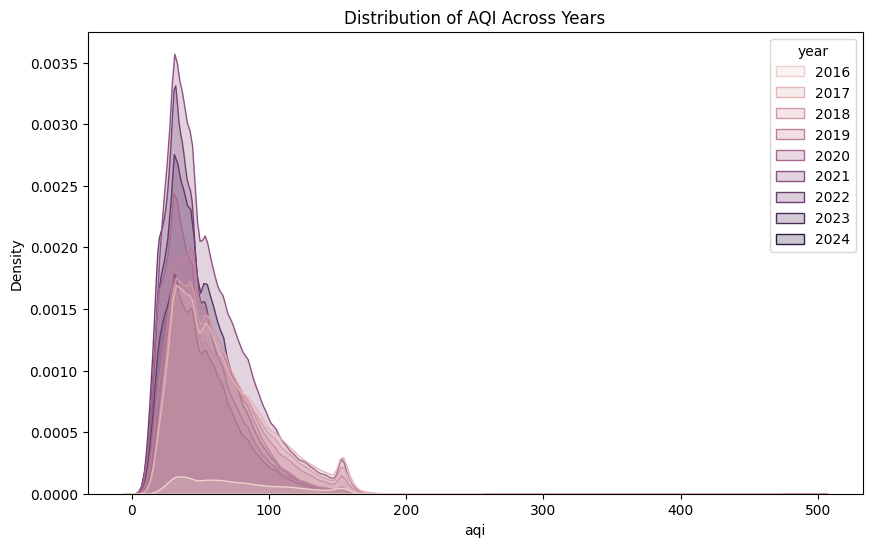

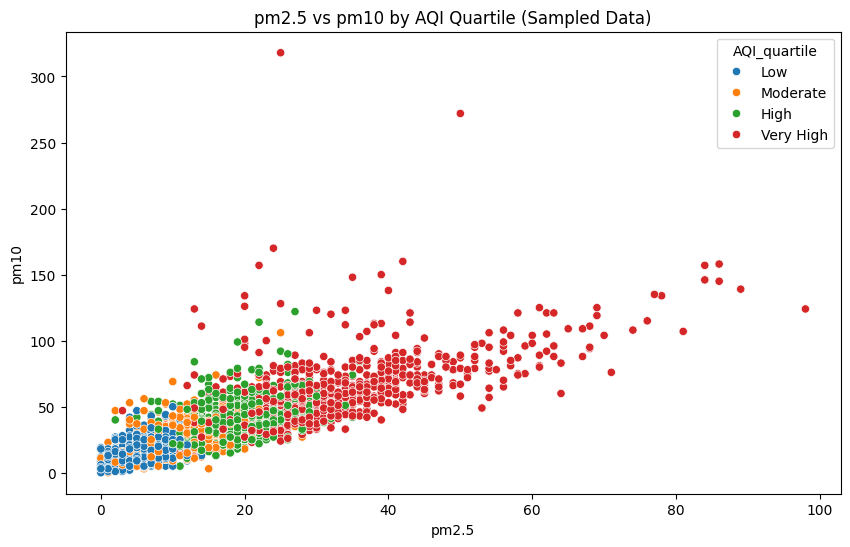

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Import matplotlib.pyplot

# Extract extra time features
df['month'] = df['Date'].dt.month # Use 'Date' column
df['day_of_week'] = df['Date'].dt.dayofweek # Use 'Date' column
df['year'] = df['Date'].dt.year # Use 'Date' column
df['DayType'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# 1. Line plot of average monthly AQI (Seaborn lineplot)
monthly_aqi = df.groupby(['year', 'month'])['aqi'].mean().reset_index() # Use 'aqi' column
plt.figure(figsize=(12,5))
sns.lineplot(x='month', y='aqi', hue='year', data=monthly_aqi, marker='o') # Use 'aqi' column
plt.title('Monthly Average AQI Over Years')
plt.show()
print("\n" * 2)

# 2. Boxplot of pm2.5 by month
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='pm2.5', data=df) # Use 'pm2.5' column
plt.title('Monthly pm2.5 Distribution')
plt.show()
print("\n" * 2)

# 3. Boxplot of AQI by site (top 10 sites by data count)
top_sites = df['sitename'].value_counts().head(10).index # Use 'sitename' column
plt.figure(figsize=(14,6))
sns.boxplot(x='sitename', y='aqi', data=df[df['sitename'].isin(top_sites)]) # Use 'sitename' and 'aqi' columns
plt.title('AQI Distribution by Top 10 Sites')
plt.xticks(rotation=45)
plt.show()
print("\n" * 2)

# 4. Heatmap of pollutant correlations
plt.figure(figsize=(8,6))
sns.heatmap(df[['pm2.5', 'pm10', 'o3', 'no2', 'so2', 'co']].corr(), annot=True, cmap='coolwarm') # Use 'pm2.5' and 'pm10' columns
plt.title('Correlation Matrix of Pollutants')
plt.show()
print("\n" * 2)

# 5. Violin plot AQI weekday vs weekend
plt.figure(figsize=(8,6))
sns.violinplot(x='DayType', y='aqi', data=df) # Use 'aqi' column
plt.title('AQI Distribution: Weekday vs Weekend')
plt.show()
print("\n" * 2)

# 6. Swarm plot pm2.5 by month
plt.figure(figsize=(14,6))
sns.swarmplot(x='month', y='pm2.5', data=df.sample(2000), size=3)  # Sample for performance, Use 'pm2.5' column
plt.title('Swarm Plot of pm2.5 by Month (Sampled Data)')
plt.show()
print("\n" * 2)

# 7. Bar plot mean AQI by weekday
weekday_aqi = df.groupby('day_of_week')['aqi'].mean().reset_index() # Use 'aqi' column
plt.figure(figsize=(8,6))
sns.barplot(x='day_of_week', y='aqi', data=weekday_aqi) # Use 'aqi' column
plt.title('Average AQI by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.show()
print("\n" * 2)

# 8. Countplot of site data points (top 10)
plt.figure(figsize=(12,6))
sns.countplot(x='sitename', data=df[df['sitename'].isin(top_sites)], order=top_sites) # Use 'sitename' column
plt.title('Data Points by Site (Top 10)')
plt.xticks(rotation=45)
plt.show()
print("\n" * 2)

# 9. Ridge plot (KDE) of AQI by year
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="aqi", hue="year", fill=True) # Use 'aqi' column
plt.title('Distribution of AQI Across Years')
plt.show()
print("\n" * 2)

# 10. Scatter plot of pm2.5 vs pm10 colored by AQI quartile
df['AQI_quartile'] = pd.qcut(df['aqi'], q=4, labels=['Low', 'Moderate', 'High', 'Very High'], duplicates='drop') # Use 'aqi' column and add duplicates='drop'
plt.figure(figsize=(10,6))
sns.scatterplot(x='pm2.5', y='pm10', hue='AQI_quartile', data=df.sample(3000)) # Use 'pm2.5' and 'pm10' columns
plt.title('pm2.5 vs pm10 by AQI Quartile (Sampled Data)')
plt.show()
print("\n" * 2)